# Download the data

In [1]:
from google.colab import files
files.upload()

{}

# Dataset Description and Problem Statement

Dataset presents pairs of phrases (an anchor and a target phrase). The **task** is to rate how similar they are on a scale from 0 (not at all similar) to 1 (identical in meaning). 


**Score meanings**


The scores are in the 0-1 range with increments of 0.25 with the following meanings:

1.0 - Very close match. This is typically an exact match except possibly for 
differences in conjugation, quantity (e.g. singular vs. plural), and addition or removal of stopwords (e.g. “the”, “and”, “or”).


0.75 - Close synonym, e.g. “mobile phone” vs. “cellphone”. This also includes abbreviations, e.g. "TCP" -> "transmission control protocol".


0.5 - Synonyms which don’t have the same meaning (same function, same properties). This includes broad-narrow (hyponym) and narrow-broad (hypernym) matches.


0.25 - Somewhat related, e.g. the two phrases are in the same high level domain but are not synonyms. This also includes antonyms.


0.0 - Unrelated.

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train.head()

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00


In [ ]:
df_test.head()

,id,anchor,target,context
0,4112d61851461f60,opc drum,inorganic photoconductor drum,G02
1,09e418c93a776564,adjust gas flow,altering gas flow,F23
2,36baf228038e314b,lower trunnion,lower locating,B60
3,1f37ead645e7f0c8,cap component,upper portion,D06
4,71a5b6ad068d531f,neural stimulation,artificial neural network,H04


# EDA

In [ ]:
print('The number of objects in train set is {}'.format(df_train.shape[0]))

The number of objects in train set is 36473


In [ ]:
print('The number of objects in test set is {}'.format(df_test.shape[0]))

The number of objects in test set is 36


The target variable is score. Let have a look in wich range the score differs.

In [ ]:
df_train['score'].unique()

array([0.5 , 0.75, 0.25, 0.  , 1.  ])

In [ ]:
df_train.describe(include='object') # there are some description information about the train dataset

,id,anchor,target,context
count,36473,36473,36473,36473
unique,36473,733,29340,106
top,37d61fd2272659b1,component composite coating,composition,H01
freq,1,152,24,2186


In [ ]:
df_test.describe(include='object') # there are some description information about the test dataset

,id,anchor,target,context
count,36,36,36,36
unique,36,34,36,29
top,4112d61851461f60,el display,inorganic photoconductor drum,G02
freq,1,2,1,3


Let us a have a look on the distribution of the features.

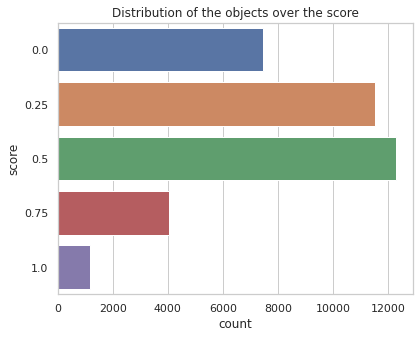

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(data=df_train,y='score')
plt.title('Distribution of the objects over the score')
plt.show()

In [ ]:
def length_disc(text):
    return len(text.split())

df_train['anchor_length'] = df_train['anchor'].apply(length_disc)
df_train['target_length'] = df_train['target'].apply(length_disc)

In [ ]:
df_train.head()

,id,anchor,target,context,score,anchor_length,target_length
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50,1,3
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75,1,3
2,36d72442aefd8232,abatement,active catalyst,A47,0.25,1,2
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50,1,2
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,1,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


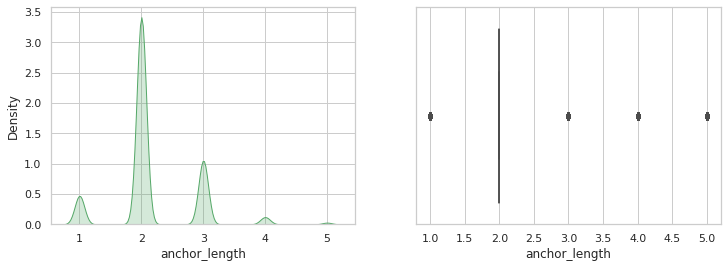

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(df_train['anchor_length'], color='g',shade=True)
plt.subplot(1,2,2)
sns.boxplot(df_train['anchor_length'])
plt.show()

There are some outliers in anchor, some phrases exceed the length of 2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


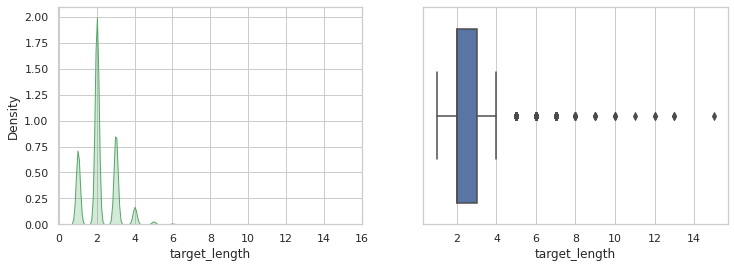

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(df_train['target_length'], color='g',shade=True)
plt.subplot(1,2,2)
sns.boxplot(df_train['target_length'])
plt.show()

There are some outliers in anchor, some phrases exceed the length of 2

In [ ]:
print("Skew: {:.3f}".format(df_train['anchor_length'].skew()))
print("Kurtosis: {:.3f}".format(df_train['anchor_length'].kurtosis()))

Skew: 0.852
Kurtosis: 2.198


In [ ]:
print("Skew: {:.3f}".format(df_train['target_length'].skew()))
print("Kurtosis: {:.3f}".format(df_train['target_length'].kurtosis()))

Skew: 1.247
Kurtosis: 6.895


# Text Normalization

In [4]:
def text_normalization(pd_series):


  pd_series = pd_series.apply(lambda x : x.lower())
  pd_series = pd_series.apply(lambda x : x.lower())
  pd_series = pd_series.apply(lambda x : re.sub(r'\d+','', x))
  pd_series = pd_series.apply(lambda x : re.sub(r'\d+','', x))

  return pd_series

In [5]:
df_train['anchor'] = text_normalization(df_train['anchor'])
df_train['target'] = text_normalization(df_train['target'])
df_test['anchor'] = text_normalization(df_test['anchor'])
df_test['target'] = text_normalization(df_test['target'])

In [6]:
# Removing Stop Words
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# import nltk for stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{"hasn't", 'very', 'until', "isn't", "didn't", 't', 'up', 'for', 'doesn', "you're", 'isn', 'their', "don't", 'didn', "she's", 'not', 'yourself', 'some', 'should', 'few', 'now', "haven't", "aren't", 'against', 'below', 'will', 'won', 'above', 'into', 'under', 'but', 'herself', 'myself', 'am', 'have', 'about', 'did', 'a', 'more', 'll', 'haven', 'ourselves', 'ours', 'shouldn', 'be', "you'll", 'yours', 'me', 'm', 'couldn', 'and', 'in', 'ma', 'shan', 'between', 've', 'each', 'how', 'why', 'any', 's', 'through', 'when', 'hasn', "hadn't", 'such', 'y', 'its', 'itself', 'by', 'as', 'too', 'here', 'further', 'from', "wouldn't", 'yourselves', 're', 'down', "you've", 'has', 'it', 'them', "you'd", 'are', 'been', 'these', 'mightn', "doesn't", 'to', 'after', 'only', 'hers', 'doing', 'this', 'mustn', 'can', 'aren', 'which', 'both', 'just', 'himself', 'theirs', 'hadn', 'weren', 'off', "shan't", 'during', 'being', 'wouldn', 'she', 'those', "couldn't", 'with', 'we', 'over', 'so', 'your', 'before', 'an', 

In [8]:
len(stop_words)

179

In [8]:
def clean_stop_wd(stop_words): 
  
  """Here we clean stop-words of lenghth less than 2"""

  stop_words_arr = [stop_word  for stop_word in stop_words
                    if len(stop_word) > 1]

  return stop_words_arr

In [9]:
stop_words_arr = clean_stop_wd(stop_words)

In [10]:
def clean_data_from_stop_w(pd_series):

  """Removing stop-words from the data"""
  
  for str_ in list(pd_series):
    for stop_word in stop_words_arr:
      if ' ' + stop_word + ' ' in str_:
        pd_series = pd_series.apply(lambda x : x.replace(' ' + stop_word + ' ', " "))

  return pd_series

In [11]:
df_train['anchor'] = clean_data_from_stop_w(df_train['anchor'])
df_train['target'] = clean_data_from_stop_w(df_train['target'])
df_test['anchor'] = clean_data_from_stop_w(df_test['anchor'])
df_test['target'] = clean_data_from_stop_w(df_test['target'])

In [15]:
df_train.head()

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00


# The simplest techniques for similarity checking


The techniques for similarity checking are Jacard Coefficient, Euclidean and Cosine Distances. In this block we apply these techniques to our dataset.

## Jacard Coefficient


In [ ]:
def jaccard_similarity(x,y):
  
  """ returns the jaccard similarity between two lists """
  x_ = set(x.split())
  y_ = set(y.split())
  intersection_cardinality = len(x_.intersection(y_))
  union_cardinality = len(x_.union(y_))

  return intersection_cardinality/float(union_cardinality)

In [ ]:
res = [[word1, word2, round(jaccard_similarity(word1,word2),2)] 
       for word1, word2 in zip(df_train['anchor'], df_train['target'])]

In [ ]:
df_metrics = pd.DataFrame(res, columns = ['anchor', 'target', 'jaccard_coeff'])

In [ ]:
df_metrics.head()

,anchor,target,jaccard_coeff
0,abatement,abatement pollution,0.5
1,abatement,act abating,0.0
2,abatement,active catalyst,0.0
3,abatement,eliminating process,0.0
4,abatement,forest region,0.0


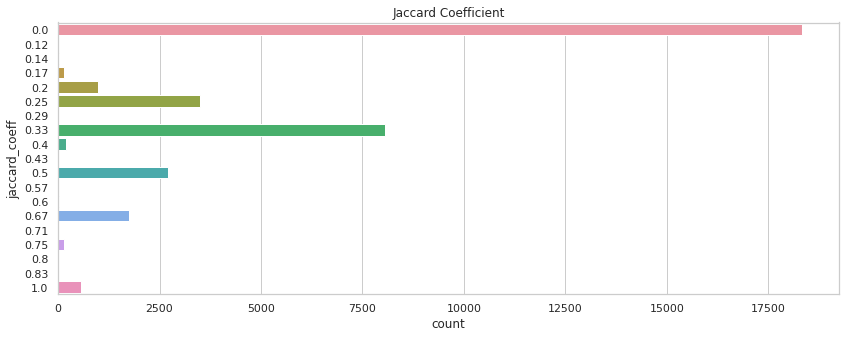

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(data=df_metrics,y='jaccard_coeff')
plt.title('Jaccard Coefficient')
plt.show()

Most phrases have 0 Jacard coefficient, because this metric is based on the calculations of the repetitions of words in two phrases under review.

## Euclidian Distance


To calculate the Euclidean Distance, first, we use bow vectors. Let's receive them using sklearn.


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
def bow(anchor, target):

  union = set(df_train['anchor'].unique()).union(set(df_train['target'].unique()))
  vectorizer = CountVectorizer()
  X = vectorizer.fit_transform(union)
  features = vectorizer.get_feature_names_out()
  bow = X.toarray()
  vocab = {word: arr for word, arr in zip(union, bow)}

  return vocab, union

In [23]:
vocab_train = bow(df_train['anchor'], df_train['target'])[0]

In [24]:
vocab_test = bow(df_test['anchor'], df_test['target'])[0]

In [12]:
def bow_extracter(pd_series, vocab):

  return  [[word, vocab[key]] for word in pd_series for key in vocab.keys() if word == key]

In [579]:
arr_anchor = bow_extracter(df_train['anchor'], vocab_train)
arr_anchor_test = bow_extracter(df_test['anchor'], vocab_test)

In [ ]:
arr_anchor[:5] # here we received bow vector for each anchor

[['abatement', array([0, 1, 0, ..., 0, 0, 0])],
 ['abatement', array([0, 1, 0, ..., 0, 0, 0])],
 ['abatement', array([0, 1, 0, ..., 0, 0, 0])],
 ['abatement', array([0, 1, 0, ..., 0, 0, 0])],
 ['abatement', array([0, 1, 0, ..., 0, 0, 0])]]

In [ ]:
arr_anchor_test[:5]

[['opc drum', array([0, 0, 0, ..., 0, 0, 0])],
 ['adjust gas flow', array([0, 0, 0, ..., 0, 0, 0])],
 ['lower trunnion', array([0, 0, 0, ..., 0, 0, 0])],
 ['cap component', array([0, 0, 0, ..., 0, 0, 0])],
 ['neural stimulation', array([0, 0, 0, ..., 0, 0, 0])]]

In [ ]:
arr_target = bow_extracter(df_train['target'], vocab_train)

In [ ]:
arr_target[:5] # here we received bow vector for each train

[['abatement pollution', array([0, 1, 0, ..., 0, 0, 0])],
 ['act abating', array([0, 0, 1, ..., 0, 0, 0])],
 ['active catalyst', array([0, 0, 0, ..., 0, 0, 0])],
 ['eliminating process', array([0, 0, 0, ..., 0, 0, 0])],
 ['forest region', array([0, 0, 0, ..., 0, 0, 0])]]

In [ ]:
arr_target_test = bow_extracter(df_test['target'], vocab_test)

In [17]:
def prepare_arr(arr):

  """ here we extract bow vectors """
  
  return [arr_[1] for arr_ in arr]

In [ ]:
anchor_bow = prepare_arr(arr_anchor)
anchor_bow_test = prepare_arr(arr_anchor_test)
target_bow = prepare_arr(arr_target)
target_bow_test = prepare_arr(arr_target_test)

Euclidean distance calculations

In [21]:
def calc_ec_dst(anchor_bow, target_bow):

  a = np.array(anchor_bow)
  b = np.array(target_bow)

  return np.linalg.norm(a-b,axis=1)

In [ ]:
dist_arr, dist_arr_test = [], []

In [ ]:
dist = calc_ec_dst(anchor_bow[15000:], target_bow[15000:])
dist_test = calc_ec_dst(anchor_bow_test, target_bow_test)
dist_arr.append(dist)
dist_arr_test.append(dist_test)

In [ ]:
ar1 = np.array(dist_arr[0])
arr2 = np.array(dist_arr[1])
dist_arr = np.concatenate((ar1, arr2), axis=None)

In [ ]:
df_metrics['euclidean dist bow'] = dist_arr

In [ ]:
df_metrics['euclidean dist bow'].unique()

array([1.        , 1.73205081, 2.        , 1.41421356, 2.23606798,
       2.44948974, 0.        , 2.82842712, 2.64575131, 3.        ,
       3.31662479])

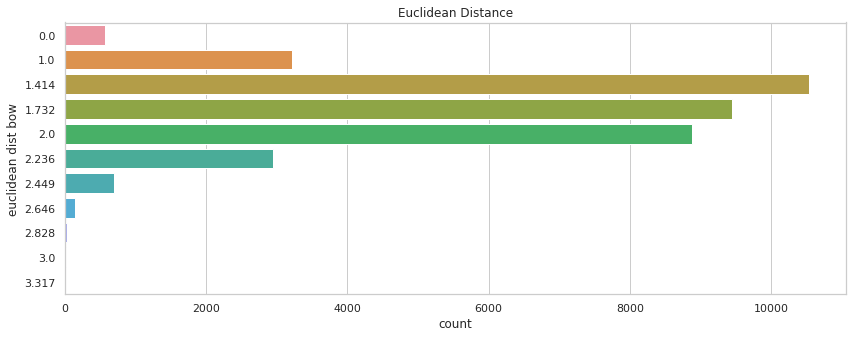

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(data=df_metrics,y=round(df_metrics['euclidean dist bow'],3))
plt.title('Euclidean Distance')
plt.show()

Most phrases have a distance of 1.414, these results are better than Jacard coefficient, because bow vectors represent words better than simple counting of repetitions of words in two phrases. However bow vectors do not reflect the context of the phrases. This is why the euclidean distance based on bow vectors do not reflect effectively the distribution of the 'score'

In [ ]:
df_metrics.head()

,anchor,target,jaccard_coeff,euclidean dist
0,abatement,abatement pollution,0.5,1.000000
1,abatement,act abating,0.0,1.732051
2,abatement,active catalyst,0.0,1.732051
3,abatement,eliminating process,0.0,1.732051
4,abatement,forest region,0.0,1.732051


In [ ]:
df_metrics.to_csv('df_metrics_1.csv')

## Cosine Distance

In [32]:
from scipy.spatial import distance

In [33]:
def calc_cos(anchor_bow, target_bow):

  cos_anc = np.array(anchor_bow)
  cos_targ = np.array(target_bow)
  cos_dst = [distance.cosine(cos_anc[i], cos_targ[i]) for i in range(len(cos_anc))]

  return cos_dst

In [ ]:
cos_1 = calc_cos(anchor_bow[:15000], target_bow[:15000])
cos_2 = calc_cos(anchor_bow[15000:], target_bow[15000:])
cos_test = calc_cos(anchor_bow_test, target_bow_test)
c1 = np.array(cos_1)
c2 = np.array(cos_2)
cos_dist = np.concatenate((c1,c2), axis=None)
df_metrics['cos_dist bow'] = cos_dist

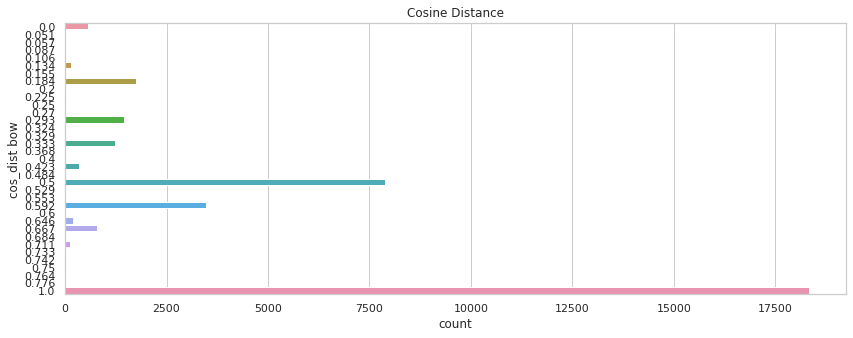

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(data=df_metrics,y=round(df_metrics['cos_dist bow'],3))
plt.title('Cosine Distance')
plt.show()

Most phrases have cosine distance equal to 1, consequently cosine similarity tends to 0. This means that bow vectors of phrases (anchor, target) are not very close to each other.


In [ ]:
df_metrics.head()

,anchor,target,jaccard_coeff,euclidean dist bow,cos_dist bow
0,abatement,abatement pollution,0.5,1.000000,0.292893
1,abatement,act abating,0.0,1.732051,1.000000
2,abatement,active catalyst,0.0,1.732051,1.000000
3,abatement,eliminating process,0.0,1.732051,1.000000
4,abatement,forest region,0.0,1.732051,1.000000


In [ ]:
df_metrics.to_csv('df_metrics_bow.csv')

In [ ]:
df_metrics['score'] = df_train['score']

In [ ]:
res_test = [[word1, word2, round(jaccard_similarity(word1,word2),2)] 
       for word1, word2 in zip(df_test['anchor'], df_test['target'])]
       
df_metrics_bow_test = pd.DataFrame(res_test, columns = ['anchor', 'target', 'jaccard_coeff'])
df_metrics_bow_test['euc_dist_bow'] = np.array(dist_test)
df_metrics_bow_test['cos_dist_bow'] = np.array(cos_test)

In [ ]:
df_metrics_bow_test.head()

,anchor,target,jaccard_coeff,euc_dist_bow,cos_dist_bow
0,opc drum,inorganic photoconductor drum,0.25,1.732051,0.591752
1,adjust gas flow,altering gas flow,0.50,1.414214,0.333333
2,lower trunnion,lower locating,0.33,1.414214,0.500000
3,cap component,upper portion,0.00,2.000000,1.000000
4,neural stimulation,artificial neural network,0.25,1.732051,0.591752


## Multiclassification


In dataset the score has 5 "levels" of similarity. We can interpret the semantic similarity problem as a multi classification task, where score is the target and features are distances calculated based on bow vectors of anchor and target.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( df_metrics.loc[:,['jaccard_coeff', 'euclidean dist bow',
       'cos_dist bow']], df_metrics['score'].astype('str'), test_size=0.33, random_state=42)

In [ ]:
lm = LogisticRegression(multi_class='ovr', C=1, solver='liblinear')
lm.fit(X_train, y_train)

LogisticRegression(C=1, multi_class='ovr', solver='liblinear')

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
print('Accuracy  {:.3f}'.format(accuracy_score(y_test, y_pred)))

Accuracy  0.473


Results are very bad. Because as we said earlier bow vectors do not reflect the context of phrases. BoW also doesn’t consider the semantic meaning of words. Furthermore, there are a lot of duplicates in data, so the results of classification are bad.

# TF-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
union = set(df_train['anchor'].unique()).union(set(df_train['target'].unique()))

In [15]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(union)
arr = X.toarray()

In [18]:
vocab_tf_idf = {word: arr for word, arr in zip(union, arr)}
tf_idf_anchor = bow_extracter(df_train['anchor'], vocab_tf_idf)
tf_idf_target = bow_extracter(df_train['target'], vocab_tf_idf)
anchor_tf_idf = prepare_arr(tf_idf_anchor)
target_tf_idf = prepare_arr(tf_idf_target)

In [19]:
dist_tf_idf = []

In [25]:
dist = calc_ec_dst(anchor_tf_idf[30000:], target_tf_idf[30000:])
dist_tf_idf.append(dist)

In [26]:
ar1 = np.array(dist_tf_idf[0])
arr2 = np.array(dist_tf_idf[1])
arr3 = np.array(dist_tf_idf[2])
arr4 = np.array(dist_tf_idf[3])
dist_arr_tf_idf = np.concatenate((ar1, arr2, arr3, arr4), axis=None)

In [ ]:
df_metrics['euc_dst_tf_idf'] = dist_arr_tf_idf

In [ ]:
df_metrics.head()

,anchor,target,jaccard_coeff,euc_dst_tf_idf
0,abatement,abatement pollution,0.5,0.753498
1,abatement,act abating,0.0,1.414214
2,abatement,active catalyst,0.0,1.414214
3,abatement,eliminating process,0.0,1.414214
4,abatement,forest region,0.0,1.414214


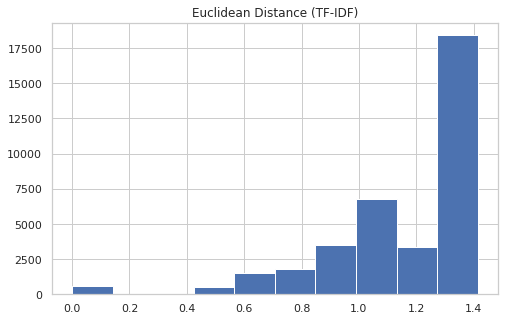

In [29]:
plt.figure(figsize=(8,5))
plt.hist(dist_arr_tf_idf)
plt.title('Euclidean Distance (TF-IDF)')
plt.show()

In [ ]:
df_metrics.to_csv('df_metrics.csv')

In [35]:
cos_1 = calc_cos(anchor_tf_idf[:10000], target_tf_idf[:10000])
cos_2 = calc_cos(anchor_tf_idf[10000:20000], target_tf_idf[10000:20000])
cos_3 = calc_cos(anchor_tf_idf[20000:30000], target_tf_idf[20000:30000])
cos_4 = calc_cos(anchor_tf_idf[30000:], target_tf_idf[30000:])
c1 = np.array(cos_1)
c2 = np.array(cos_2)
c3 = np.array(cos_3)
c4 = np.array(cos_4)
cos_dist = np.concatenate((c1,c2, c3, c4), axis=None)
df_metrics['cos_dist_tf_idf'] = cos_dist

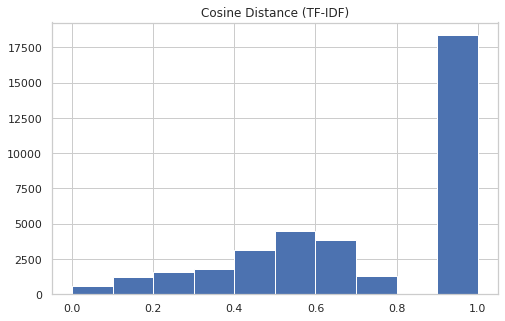

In [36]:
plt.figure(figsize=(8,5))
plt.hist(cos_dist)
plt.title('Cosine Distance (TF-IDF)')
plt.show()

In [ ]:
df_metrics.head()

,anchor,target,jaccard_coeff,euc_dst_tf_idf,cos_dist_tf_idf
0,abatement,abatement pollution,0.5,0.753498,0.28388
1,abatement,act abating,0.0,1.414214,1.00000
2,abatement,active catalyst,0.0,1.414214,1.00000
3,abatement,eliminating process,0.0,1.414214,1.00000
4,abatement,forest region,0.0,1.414214,1.00000


The results are more or less closed to bow cosine and euclidean calculations

In [ ]:
df_metrics.to_csv('df_metrics.csv')

## Multiclassification

We decided not to implement the logistic classification, because tf-idf vectors still do not represent the semantic meaning of words. So the results would be more or less the same as in the previous section (bow)

# Similarity Based on Embeddings

# FastText

In [103]:
from gensim.models.fasttext import FastText
from nltk.tokenize import sent_tokenize

In [105]:
word_tokenized_corpus = list(bow(df_train['anchor'], df_train['target'])[1])

In [108]:
word_tokenized_corpus = [sent.split()
     for sent in  word_tokenized_corpus]

In [551]:
model = FastText(size=64, window=3, min_count=1)  
model.build_vocab(word_tokenized_corpus)
model.train(word_tokenized_corpus, total_examples=len(word_tokenized_corpus), epochs=50)

In [552]:
emb_dict = {word : model.wv[word] for word in model.wv.vocab.keys()}

In [553]:
def get_emb(pd_series, model):
  a = [w.split() for w in pd_series]
  return [model.wv[sent].mean(axis=0) for sent in a]

In [554]:
anchor_ft_emb = get_emb(df_train['anchor'], model)

In [555]:
target_ft_emb = get_emb(df_train['target'], model)

In [556]:
# let calculate cosine dist

cos_ft = calc_cos(anchor_ft_emb, target_ft_emb)

In [557]:
df_metric_ft = pd.DataFrame(df_train.loc[:,['anchor', 'target']], columns = ['anchor', 'target'])
df_metric_ft['cos_dist'] = np.round_(np.array(cos_ft),3)
df_metric_ft['score'] = df_train['score']

In [567]:
df_metric_ft.head()

,anchor,target,cos_dist,score
0,abatement,abatement pollution,0.187,0.50
1,abatement,act abating,0.484,0.75
2,abatement,active catalyst,0.617,0.25
3,abatement,eliminating process,0.603,0.50
4,abatement,forest region,0.714,0.00


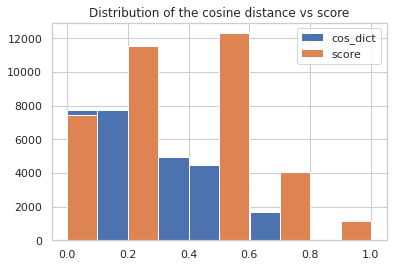

In [570]:
plt.hist(df_metric_ft['cos_dist'], label = 'cos_dict')
plt.hist(df_metric_ft['score'], label = 'score')
plt.title('Distribution of the cosine distance vs score')
plt.legend()
plt.show()


The results are better than calculated distances based on bow and tf-idf vectors, however the results obtained are not excellent, because here some examples of targets are very unusual. So it would be better to take into account the context of the patent's name. This information will be included in the next section where we use neural networks.
